# Analyse reindexation from ABES - April 2023

# Set project

### Packages

In [1]:
# Import librairies
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings



from utils_metrics import *
from utils_visualization import *

2023-06-28 10:11:36.863119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package words to /home/aurelie/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aurelie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/aurelie/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Suppression des FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### Graphical parameters

In [3]:
# Parametres graphiques
%matplotlib inline
rcParams = {
    'font.size': 14,
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.max_open_warning': 30}

sns.set(rc=rcParams)
sns.set_style(
    "whitegrid", {
        'axes.edgecolor': 'k',
        'axes.linewidth': 1,
        'axes.grid': True,
        'xtick.major.width': 1,
        'ytick.major.width': 1
        })

sns.set_context(
    "notebook",
    font_scale=1.1,
    rc={"lines.linewidth": 1.5})

pd.set_option('display.max_columns', None)

### Paths

In [4]:
# Set paths
path = "."
os.chdir(path)
data_path = path + "/data"
output_path = path + "/outputs"
fig_path = path + "/figs"

In [5]:
# Include embeddings
include_embedding = False

# Import data

In [6]:
# Original dataset
rameau_file = "rameau_Tf_Td.csv"
sudoc = "working_data_sans_dewey.csv"
if include_embedding:
    reindex_file = "data_with_reindexation_and_embeddings.csv"
else:
    reindex_file = "reindexation_final_juin2023.csv"

In [7]:
#Import data
reindex = pd.read_csv(os.path.join(data_path, reindex_file), index_col=0)
print(reindex.shape)
reindex.head(3)

(100, 16)


N°ordre        PPN                                              TITRE   
0       79  000308838  Les sommets de l'État : essai sur l'élite du p...  \
1       58  003632806  Les intellectuels sous la Ve République : 1958...   
2       59  047450037                                Bouddha, bouddhisme   

                                              RESUME   
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...  \
1  Célèbres, influents, on les voit, on en parle ...   
2  La 4e de couv. indique : "Ce petit livre répon...   

                                       INDEX_UNI_AFE   
0  606$3027223345$aClasses dirigeantes$3027226794...  \
1  606$3027235149$aIntellectuels$3027284948$yFran...   
2                         606$3027321835$aBouddhisme   

                                           INDEX_AFE   
0  Classes dirigeantes -- France -- Histoire;;Pou...  \
1  Intellectuels -- France -- 1958-.... (5e Répub...   
2                                         Bouddhisme   

                                       INDEX_UNI_MCR   
0  606 $3027365581$aPouvoir (sciences sociales)$3...  \
1  606 $3027235149$aIntellectuels$3027226794$yFra...   
2                        606 $3027321835$aBouddhisme   

                                           INDEX_MCR   
0  Pouvoir (sciences sociales) -- Classes dirigea...  \
1                    Intellectuels -- France -- 1945   
2                                         Bouddhisme   

                                       INDEX_UNI_JMF   
0  606$3027223345$aClasses dirigeantes$302779430X...  \
1  606$3028696980$aIntellectuels français$3049647...   
2  606$3027431215$aPhilosophie bouddhique \n606$3...   

                                           INDEX_JMF   
0  Classes dirigeantes -- Relations avec l'État -...  \
1  Intellectuels français -- Sociologie ;;Intelle...   
2   Philosophie bouddhique ;;Spiritualité bouddhique   

                                       INDEX_UNI_LPL   
0  606$3027322610$aHauts-fonctionnairesss$3027226...  \
1  606$027235149$aIntellectuels$3027284948$yFranc...   
2  606$3027321835$aBouddhisme$3027789853$xEtude e...   

                                           INDEX_LPL   
0  Hauts-fonctionnairesss -- France;;Classes diri...  \
1  Intellectuels -- France -- 1958 (5e République...   
2  Bouddhisme -- Étude et enseignement;;Philosoph...   

                                       INDEX_UNI_LJZ   
0  606$3027223345$aClasses dirigeantes$3027226794...  \
1  606$3027235149$aIntellectuels$3027226794$yFran...   
2  606$3027321835$aBouddhisme$3030974208$xCoutume...   

                                           INDEX_LJZ   
0  Classes dirigeantes -- France;;Hauts-fonctionn...  \
1  Intellectuels -- France;;Vie intellectuelle --...   
2  Bouddhisme -- Coutumes et pratiques;;Bouddhism...   

                                       INDEX_UNI_MPD   
0  606$3027223345$aClasses dirigeantes$3027226794...  \
1  606 ##‎$3027235149Intellectuels‎$3027284948$yF...   
2                         606$3027321835$aBouddhisme   

                                           INDEX_MPD  
0  Classes dirigeantes -- France -- Histoire;;Éli...  
1  Intellectuels -- France -- 1958-.... (5e Répub...  
2                                         Bouddhisme

In [8]:
# Import SUDOC
sudoc_file = pd.read_csv(os.path.join(data_path, sudoc), index_col=0)
sudoc_file.head(3)

PPN                                              TITRE   
0  000002364                              La culture pour vivre  \
1  000014877  La nuit, le jour : essai psychanalytique sur l...   
2  000021857                                 Ruptures, cultures   

                                              RESUME   
0  Mort de la culture populaire en France. Mutati...  \
1  Discontinuité, latence, rétablissement d’une c...   
2  Il faut imaginer Robinson sur son île, au mome...   

                                              RAMEAU   DEWEY   
0  Culture populaire;Diffusion de la culture;Poli...     840  \
1          Complexe de castration;Psychanalyse;Rêves  154.63   
2                                            Culture     840   

                                               DESCR   
0  La culture pour vivre Mort de la culture popul...  \
1  La nuit, le jour : essai psychanalytique sur l...   
2  Ruptures, cultures Il faut imaginer Robinson s...   

                                      RAMEAU_CHECKED   
0  Culture populaire;Diffusion de la culture;Poli...  \
1          Complexe de castration;Psychanalyse;Rêves   
2                                            Culture   

   presence_chaine_indexation   
0                       False  \
1                       False   
2                       False   

                                rameau_chaines_index   
0  ['Culture populaire', 'Diffusion de la culture...  \
1  ['Complexe de castration', 'Psychanalyse', 'Rê...   
2                                        ['Culture']   

                                     rameau_concepts  
0  ['Culture populaire', 'Diffusion de la culture...  
1  ['Complexe de castration', 'Psychanalyse', 'Rê...  
2                                        ['Culture']

In [9]:
# Import rameau list
ram = pd.read_csv(os.path.join(data_path, rameau_file), index_col=0)
print("Nombre de notices différentes: ", ram.shape[0])
ram.head(10)

Nombre de notices différentes:  103021


NOM
0                  Pica (oiseaux)
1            Langues brittoniques
2  Consentement (droit canonique)
3            Diplomates écrivains
4                      Augustines
5         Accélérateurs cosmiques
6                    Et le Québec
7            Propagande allemande
8         Navigateurs (logiciels)
9                Lymphangiectasie

## Merge SUDOC and reindexation files

In [10]:
df = reindex.merge(sudoc_file[["PPN", "RAMEAU"]], on="PPN", how="inner")
print(df.shape)
df.head(5)

(100, 17)


N°ordre        PPN                                              TITRE   
0       79  000308838  Les sommets de l'État : essai sur l'élite du p...  \
1       58  003632806  Les intellectuels sous la Ve République : 1958...   
2       59  047450037                                Bouddha, bouddhisme   
3       65  058296182                         L'homme devant l'incertain   
4       80  059911174  Imperator Caesar Augustus : recherches sur le ...   

                                              RESUME   
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...  \
1  Célèbres, influents, on les voit, on en parle ...   
2  La 4e de couv. indique : "Ce petit livre répon...   
3  La quatrième de couverture indique : "Réintrod...   
4  Ce dossier comporte quatre volumes qui aborden...   

                                       INDEX_UNI_AFE   
0  606$3027223345$aClasses dirigeantes$3027226794...  \
1  606$3027235149$aIntellectuels$3027284948$yFran...   
2                         606$3027321835$aBouddhisme   
3            606$302736576X$aPhilosophie et sciences   
4  606$3027873757$aCulte impérial$302724301X$yRom...   

                                           INDEX_AFE   
0  Classes dirigeantes -- France -- Histoire;;Pou...  \
1  Intellectuels -- France -- 1958-.... (5e Répub...   
2                                         Bouddhisme   
3                            Philosophie et sciences   
4  Culte impérial -- Rome (Italie);;Empereurs -- ...   

                                       INDEX_UNI_MCR   
0  606 $3027365581$aPouvoir (sciences sociales)$3...  \
1  606 $3027235149$aIntellectuels$3027226794$yFra...   
2                        606 $3027321835$aBouddhisme   
3          606 $3027248283$aPhilosophie des sciences   
4  606 $3027234312$aImpérialisme$3027365581$xPouv...   

                                           INDEX_MCR   
0  Pouvoir (sciences sociales) -- Classes dirigea...  \
1                    Intellectuels -- France -- 1945   
2                                         Bouddhisme   
3                           Philosophie des sciences   
4  Impérialisme -- Pouvoir (sciences sociales) --...   

                                       INDEX_UNI_JMF   
0  606$3027223345$aClasses dirigeantes$302779430X...  \
1  606$3028696980$aIntellectuels français$3049647...   
2  606$3027431215$aPhilosophie bouddhique \n606$3...   
3  606$3027286584$aCréativité$3027248275$xScience...   
4  606$3027873757$aCulte impérial$3027243001$yRom...   

                                           INDEX_JMF   
0  Classes dirigeantes -- Relations avec l'État -...  \
1  Intellectuels français -- Sociologie ;;Intelle...   
2   Philosophie bouddhique ;;Spiritualité bouddhique   
3  Créativité -- Sciences ;;Devenir (philosophie)...   
4  Culte impérial -- Rome ;;Politique et gouverne...   

                                       INDEX_UNI_LPL   
0  606$3027322610$aHauts-fonctionnairesss$3027226...  \
1  606$027235149$aIntellectuels$3027284948$yFranc...   
2  606$3027321835$aBouddhisme$3027789853$xEtude e...   
3  606$3027248283$aPhilosophie des sciences\n606$...   
4  606$3027365581$aPouvoir (sciences sociales)$30...   

                                           INDEX_LPL   
0  Hauts-fonctionnairesss -- France;;Classes diri...  \
1  Intellectuels -- France -- 1958 (5e République...   
2  Bouddhisme -- Étude et enseignement;;Philosoph...   
3      Philosophie des sciences;;Futur (philosophie)   
4  Pouvoir (sciences sociales) -- Histoire -- Rom...   

                                       INDEX_UNI_LJZ   
0  606$3027223345$aClasses dirigeantes$3027226794...  \
1  606$3027235149$aIntellectuels$3027226794$yFran...   
2  606$3027321835$aBouddhisme$3030974208$xCoutume...   
3  606$3027582957$aLoi (philosophie)\n606$3027365...   
4  606$3027873757$aCulte impérial$302724301X$yRom...   

                                           INDEX_LJZ   
0  Classes dirigeantes -- France;;Hauts-fonctionn...  \
1  Intellectuels -- France;;Vie intellectuelle --...   
2  Boudd

# Analyse RAMEAU concepts

In [11]:
index_columns = [
    'INDEX_AFE', 'INDEX_MCR', 'INDEX_JMF',
    'INDEX_LPL', 'INDEX_LJZ','INDEX_MPD'
]

## Number of Indexation chains

In [12]:
df["nb_chaine_index_rameau"] = df["RAMEAU"].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";")))
if include_embedding:
    df["nb_chaine_index_embeddings"] = df["embedding_chains"].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";")))
for col in index_columns:
    print("Dealing with ", col)
    index_name = col.split("_")[1]
    new_col_name = str("nb_chaine_index_" + index_name)
    df[new_col_name] = df[col].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";;")))

Dealing with  INDEX_AFE
Dealing with  INDEX_MCR
Dealing with  INDEX_JMF
Dealing with  INDEX_LPL
Dealing with  INDEX_LJZ
Dealing with  INDEX_MPD


In [13]:
# Count nb of chain
if include_embedding:
    cols = [
        "nb_chaine_index_rameau",
        "nb_chaine_index_embeddings",
        "nb_chaine_index_AFE",
        "nb_chaine_index_MCR",
        "nb_chaine_index_JMF",
        "nb_chaine_index_LPL",
        "nb_chaine_index_LJZ",
        "nb_chaine_index_MPD"]
else: 
        cols = [
        "nb_chaine_index_rameau",
        "nb_chaine_index_AFE",
        "nb_chaine_index_MCR",
        "nb_chaine_index_JMF",
        "nb_chaine_index_LPL",
        "nb_chaine_index_LJZ",
        "nb_chaine_index_MPD"]

In [14]:
subset = df[cols].melt()
subset

variable  value
0    nb_chaine_index_rameau      7
1    nb_chaine_index_rameau      2
2    nb_chaine_index_rameau      1
3    nb_chaine_index_rameau      7
4    nb_chaine_index_rameau      2
..                      ...    ...
695     nb_chaine_index_MPD      2
696     nb_chaine_index_MPD      3
697     nb_chaine_index_MPD      3
698     nb_chaine_index_MPD      3
699     nb_chaine_index_MPD      3

[700 rows x 2 columns]

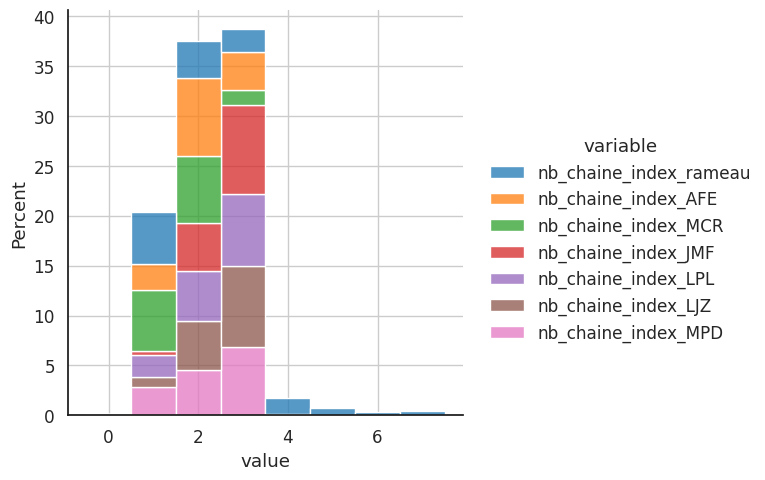

In [15]:
# Number of indexation chain
sns.displot(x="value", hue="variable", data=subset, palette="tab10", discrete=True, stat="percent", multiple="stack")

In [16]:
## Check for notices with more than a threshold
c = ["PPN", "TITRE", "RAMEAU"] + cols + index_columns
thres = 4
mask = df[cols] >= thres
high_nb_index_chain = df.loc[mask.sum(axis=1) >= 1, c]

In [17]:
high_nb_index_chain

PPN                                              TITRE   
0   000308838  Les sommets de l'État : essai sur l'élite du p...  \
3   058296182                         L'homme devant l'incertain   
10  077880560  Etude du vascular endothelial growth factor (V...   
14  126056536       Tennis : soyez P.R.O. : la méthode pour oser   
20  159761875  Les sociétés coloniales à l'âge des empires : ...   
22  163093741  Le cri d'Archimède : l'art de la Découverte et...   
26  181543656  Israël entre quatre murs : la politique sécuri...   
28  183201523  L'habitat du Néolithique ancien de Colombelles...   
40  200404342  La fabrique des classiques africains : écrivai...   
50  231860838                              La justice prédictive   
60  237156989      Le photojournalisme peut-il sauver la presse    
63  248194305                                 Le travail du care   
72  255264887  Épreuves écrites du CRFPA : spécialité droit p...   
73  257349006  Vivre plus simplement : analyse sociologique d...   
74  257504990                             La nouvelle économique   
77  261199609  Grosse, et alors  : connaître et combattre la ...   
79  262267888  Ce que les GAFAM font aux médias africains : e...   
81  263439038  Jouer, rêver, inventer... : la créativité à l'...   
90  05224170X  Apprendre à aimer les mathématiques : conditio...   
98  26117309X  Monde enchanté : chansons et imaginaires géogr...   
99  26753177X  Algocratie : allons-nous donner le pouvoir aux...   

                                               RAMEAU  nb_chaine_index_rameau   
0   Bureaucratie;Classes dirigeantes;Classes dirig...                       7  \
3   Chaos (théorie des systèmes);Incertitude;Libre...                       7   
10  Facteur de croissance des cellules endothélial...                       4   
14  Performance (sports);Tennis -- Aspect psycholo...                       4   
20  Colonies;Colonies;Colonies;Colonisation -- Asp...                       7   
22  Créativité;Créativité en sciences;Découvertes ...                       5   
26  Conflit israélo-arabe;Menaces;Relations milita...                       4   
28  Antiquités;Culture à céramique linéaire;Fouill...                       4   
40  Littérature africaine de langue française -- A...                       5   
50  Droit -- Informatique -- Aspect moral;Droit et...                       5   
60  Journalisme électronique;Photographes de press...                       4   
63  Aides-soignants -- Conditions de travail;Compo...                       5   
72  Droit pénal;Obligations (droit);Procédure péna...                       4   
73  Auto-développement (psychothérapie);Changement...                       6   
74  Cycles économiques;Planification économique;Éc...                       4   
77  Corps humain -- Aspect social;Discrimination;G...                       4   
79  Diffusion sélective de l'information;Géants du...                       6   
81  Créativité (éducation);Créativité -- Chez l'en...                       4   
90  Mathématiques -- Étude et enseignement -- Aspe...                       4   
98  Chansons -- Art d'écrire -- Géographie;Géograp...                       4   
99  Algorithmes;Changement social;Informatique -- ...                       5   

    nb_chaine_index_AFE  nb_chaine_index_MCR  nb_chaine_index_JMF   
0                     2                    2                    3  \
3                     1                    1                    3   
10                    2                    1                    3   
14                    2                    1                    3   
20                    2                    2                    3   
22                    3                    2                    3   
26                    3                    2                    3   
28                    3                    2                    3   
40                    3                    2                    3   
50                    3                 

## Get all concepts

In [18]:
# Mettre à plat TOUS les mots clé
pattern = r';;\s*(?![^()$]*\))| -- |-- | --|--| - '

df["rameau_concept"] = df["RAMEAU"].apply(lambda x: re.split(r";| -- ", str(x)))
for col in index_columns:
    name = col.split("_")[1]
    print("Dealing with: ", name)
    new_col = str('rameau_concept_' + name)
    df[new_col] = df[col].apply(lambda x: re.split(pattern, str(x)))


Dealing with:  AFE
Dealing with:  MCR
Dealing with:  JMF
Dealing with:  LPL
Dealing with:  LJZ
Dealing with:  MPD


## Format data

In [19]:
df.columns

Index(['N°ordre', 'PPN', 'TITRE', 'RESUME', 'INDEX_UNI_AFE', 'INDEX_AFE',
       'INDEX_UNI_MCR', 'INDEX_MCR', 'INDEX_UNI_JMF', 'INDEX_JMF',
       'INDEX_UNI_LPL', 'INDEX_LPL', 'INDEX_UNI_LJZ', 'INDEX_LJZ',
       'INDEX_UNI_MPD', 'INDEX_MPD', 'RAMEAU', 'nb_chaine_index_rameau',
       'nb_chaine_index_AFE', 'nb_chaine_index_MCR', 'nb_chaine_index_JMF',
       'nb_chaine_index_LPL', 'nb_chaine_index_LJZ', 'nb_chaine_index_MPD',
       'rameau_concept', 'rameau_concept_AFE', 'rameau_concept_MCR',
       'rameau_concept_JMF', 'rameau_concept_LPL', 'rameau_concept_LJZ',
       'rameau_concept_MPD'],
      dtype='object')

In [20]:
col_to_keep = ["PPN", "rameau_concept", "rameau_concept_AFE",
               "rameau_concept_MCR", "rameau_concept_JMF",
                "rameau_concept_LPL", "rameau_concept_LJZ", "rameau_concept_MPD"]
df_pivot = pd.melt(df[col_to_keep], id_vars=["PPN"])
df_pivot

PPN            variable   
0    000308838      rameau_concept  \
1    003632806      rameau_concept   
2    047450037      rameau_concept   
3    058296182      rameau_concept   
4    059911174      rameau_concept   
..         ...                 ...   
695  23690454X  rameau_concept_MPD   
696  24155859X  rameau_concept_MPD   
697  25561280X  rameau_concept_MPD   
698  26117309X  rameau_concept_MPD   
699  26753177X  rameau_concept_MPD   

                                                 value  
0    [Bureaucratie, Classes dirigeantes, Classes di...  
1              [Intellectuels, Intellectuels français]  
2                                         [Bouddhisme]  
3    [Chaos (théorie des systèmes), Incertitude, Li...  
4    [Pouvoir (sciences sociales), Histoire, Rites ...  
..                                                 ...  
695  [Patrimoine culturel, Droit, Patrimoine cultur...  
696  [Installations sonores (art), Art, Méthodes ex...  
697  [Mouvements sociaux, France, 2000-...., Postmo...  
698  [Chansons, Thèmes, motifs, Musique et géograph...  
699  [Société numérique, Algorithmes, Utilisation, ...  

[700 rows x 3 columns]

In [21]:
labels=df_pivot["value"]
labels

0      [Bureaucratie, Classes dirigeantes, Classes di...
1                [Intellectuels, Intellectuels français]
2                                           [Bouddhisme]
3      [Chaos (théorie des systèmes), Incertitude, Li...
4      [Pouvoir (sciences sociales), Histoire, Rites ...
                             ...                        
695    [Patrimoine culturel, Droit, Patrimoine cultur...
696    [Installations sonores (art), Art, Méthodes ex...
697    [Mouvements sociaux, France, 2000-...., Postmo...
698    [Chansons, Thèmes, motifs, Musique et géograph...
699    [Société numérique, Algorithmes, Utilisation, ...
Name: value, Length: 700, dtype: object

In [22]:
def flatten(list):
    flat_list = [item for sublist in list for item in sublist]
    return flat_list

In [23]:
keywords = flatten(labels)
print(f"Le dataset contient {len(set(keywords))} concepts RAMEAU differents")

Le dataset contient 964 concepts RAMEAU differents


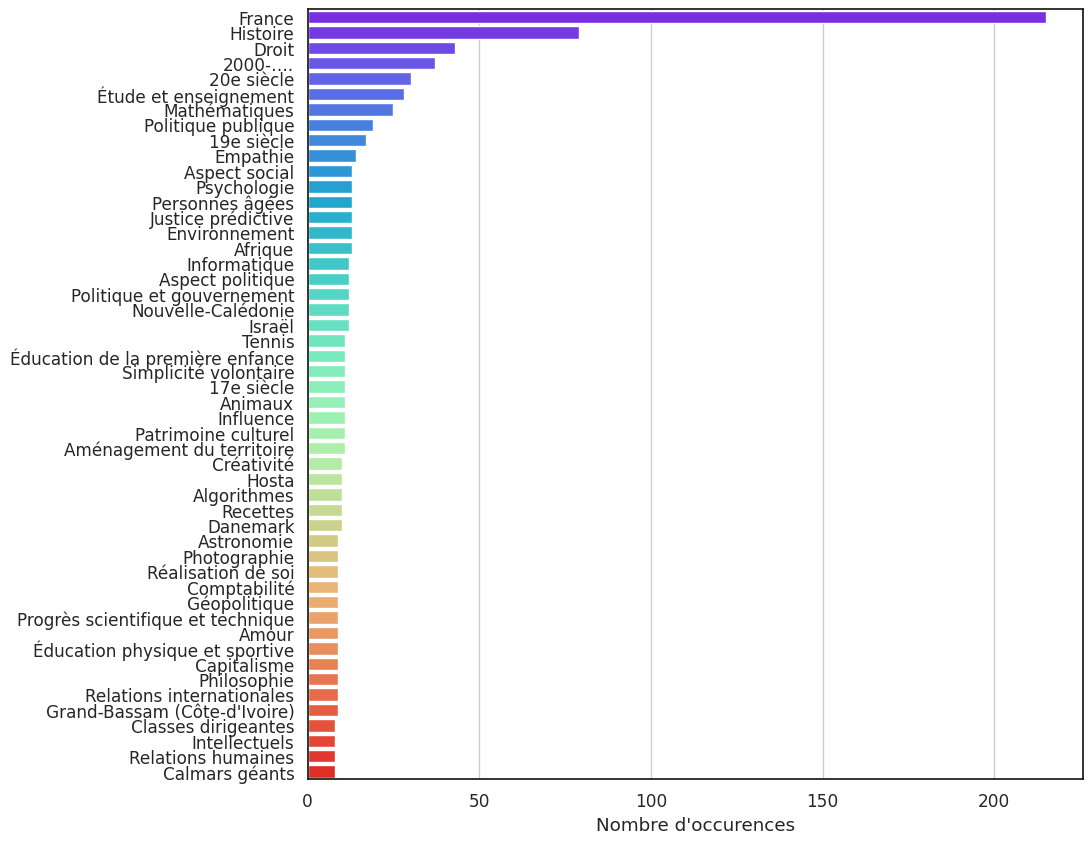

In [24]:
plot_barplot_of_tags(
    keywords,
    nb_of_tags=50,
    xlabel="Nombre d'occurences",
    ylabel="",
    figsave="barplot_concept_reindexation.png",
    figsize=(10, 10),
    palette="rainbow",
    orient="h",
)

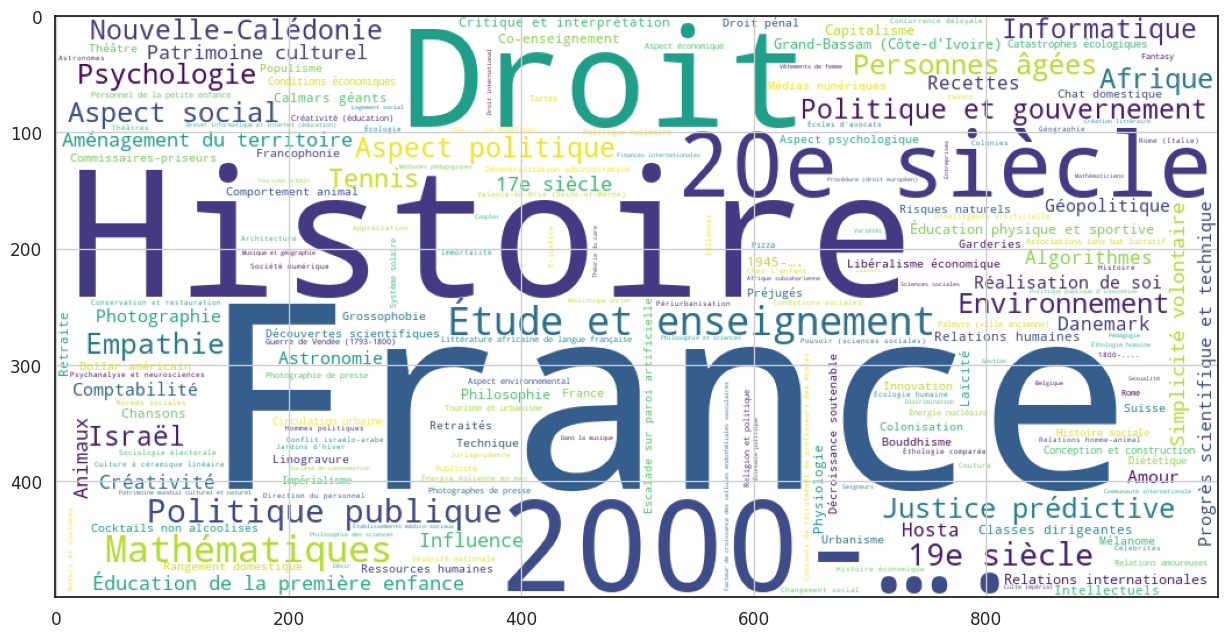

In [25]:
plot_wordcloud(
    keywords,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_reindexation.png",
)

In [26]:
all_possible_concepts =ram["NOM"].to_list()
print(f"Le dictionnaire RAMEAU contient {len(all_possible_concepts)} concepts differents")

Le dictionnaire RAMEAU contient 103021 concepts differents


# Multilabel classification

## By Concepts

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [28]:
mlb

MultiLabelBinarizer()

In [29]:
# Binarization
concepts = mlb.fit_transform([all_possible_concepts]) # all_concepts
concepts

array([[1, 1, 1, ..., 1, 1, 1]])

In [30]:
# Verification que l'on a bien encodé tous les concepts possibles
len(concepts[0])

103021

In [31]:
# Veridication de l'encoage
mlb.classes_

array(['!Xóõ (langue)',
       '"Sprach- und Sachatlas Italiens und der Südschweiz"',
       '"Taalatlas van Noord- en Zuid-Nederland"', ..., 'Ḥawfi', 'Ṭhumrī',
       'Ṭār (tambour), Musique de'], dtype=object)

In [32]:
# Binarisation des concepts
sudoc = mlb.transform(df["rameau_concept"])
afe = mlb.transform(df["rameau_concept_AFE"])
mcr = mlb.transform(df["rameau_concept_MCR"])
jmf = mlb.transform(df["rameau_concept_JMF"])
lpl = mlb.transform(df["rameau_concept_LPL"])
ljz = mlb.transform(df["rameau_concept_LJZ"])
mpd = mlb.transform(df["rameau_concept_MPD"])

if include_embedding:
    embed = mlb.transform(df["embeddings_autorites"])

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Aspect psychologique', 'Aspect religieux'] will be ignored
  warnings.warn(
/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['1789-1799 (Révolution)', '17e siècle', '1800-….', '1945-….', '1958-.... (5e République)', '19e siècle', '2000-....', '2000-….', '20e siècle', 'Afrique', 'Afrique subsaharienne', 'Angers (Maine-et-Loire)', 'Aspect psychologique', 'Belgique', 'Brevet Informatique et Internet (pédagogie)', 'Cancers', 'Colombelles (Calvados)', 'Colonialisme et ethnologie', 'Construction et conception', 'Contrat Social', 'Danemark', 'France', 'Grand-Bassam', 'Géants du web', 'Histoire ', 'Israël', 'Littérature post-coloniale', 'Mythes', 'Méthodes pédagogiques', 'Nouvelle-Calédonie', 'Palmyre (ville ancienne)', 'Performances (sport)', 'Personnel de la santé pub

In [33]:
from itertools import combinations_with_replacement


if include_embedding:
    index_name = ["sudoc", "embeddings", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
    concept_list = [sudoc, embed, afe, mcr, jmf, lpl, ljz, mpd]
else: 
    index_name = ["sudoc", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
    concept_list = [sudoc, afe, mcr, jmf, lpl, ljz, mpd]
results = dict()

for names, concept in zip(list(combinations_with_replacement(index_name, 2)), list(combinations_with_replacement(concept_list, 2))):
    print(f"comparing {names[0]} and  {names[1]}")
    name = str(names[0] + '-' + names[1])
    results[name] = label_metrics_report("reindexation_concepts", y_true=concept[0], y_pred=concept[1], zero_division=0)

comparing sudoc and  sudoc


comparing sudoc and  afe
comparing sudoc and  mcr
comparing sudoc and  jmf
comparing sudoc and  lpl
comparing sudoc and  ljz
comparing sudoc and  mpd
comparing afe and  afe
comparing afe and  mcr
comparing afe and  jmf
comparing afe and  lpl
comparing afe and  ljz
comparing afe and  mpd
comparing mcr and  mcr
comparing mcr and  jmf
comparing mcr and  lpl
comparing mcr and  ljz
comparing mcr and  mpd
comparing jmf and  jmf
comparing jmf and  lpl
comparing jmf and  ljz
comparing jmf and  mpd
comparing lpl and  lpl
comparing lpl and  ljz
comparing lpl and  mpd
comparing ljz and  ljz
comparing ljz and  mpd
comparing mpd and  mpd


### Dataframe of results

In [37]:
result_df = pd.DataFrame(results).T
result_df

Hamming Loss Brier Loss Accuracy Precision - Macro Recall - Macro   
sudoc-sudoc          0.0        NaN      1.0          0.002349       0.002349  \
sudoc-afe       0.000033        NaN     0.06          0.000837       0.000863   
sudoc-mcr       0.000038        NaN     0.04          0.000718       0.000714   
sudoc-jmf        0.00004        NaN     0.03          0.000769       0.000773   
sudoc-lpl       0.000032        NaN     0.07          0.000968       0.000968   
sudoc-ljz        0.00004        NaN     0.02          0.000648       0.000635   
sudoc-mpd       0.000027        NaN     0.11          0.001155       0.001178   
afe-afe              0.0        NaN      1.0          0.002174       0.002174   
afe-mcr         0.000036        NaN     0.06          0.000792       0.000759   
afe-jmf         0.000034        NaN     0.03          0.000936       0.000928   
afe-lpl          0.00003        NaN     0.05          0.000966       0.000963   
afe-ljz         0.000031        NaN     0.02          0.000981       0.000963   
afe-mpd         0.000025        NaN     0.13          0.001207       0.001182   
mcr-mcr              0.0        NaN      1.0          0.002475       0.002475   
mcr-jmf         0.000039        NaN     0.05          0.000852       0.000868   
mcr-lpl         0.000036        NaN     0.01          0.000784       0.000789   
mcr-ljz         0.000039        NaN      0.0          0.000764        0.00077   
mcr-mpd         0.000033        NaN     0.09          0.000986       0.001017   
jmf-jmf              0.0        NaN      1.0           0.00265        0.00265   
jmf-lpl         0.000036        NaN     0.05           0.00088       0.000872   
jmf-ljz         0.000038        NaN     0.01          0.000839       0.000844   
jmf-mpd         0.000034        NaN     0.04           0.00099       0.001002   
lpl-lpl              0.0        NaN      1.0          0.002262       0.002262   
lpl-ljz         0.000035        NaN     0.03           0.00082       0.000829   
lpl-mpd         0.000027        NaN     0.11          0.001119        0.00114   
ljz-ljz              0.0        NaN      1.0          0.002398       0.002398   
ljz-mpd         0.000033        NaN     0.03          0.000923        0.00094   
mpd-mpd              0.0        NaN      1.0          0.002349       0.002349   

            F1_Score - Macro Jaccard - Macro Precision - Weighted   
sudoc-sudoc         0.002349        0.002349                  1.0  \
sudoc-afe            0.00084        0.000815              0.36398   
sudoc-mcr           0.000705        0.000677             0.330403   
sudoc-jmf           0.000761        0.000744              0.33128   
sudoc-lpl           0.000953        0.000931             0.416984   
sudoc-ljz            0.00063         0.00061             0.294662   
sudoc-mpd           0.001151        0.001123             0.501068   
afe-afe             0.002174        0.002174                  1.0   
afe-mcr             0.000764        0.000739             0.384769   
afe-jmf             0.000921        0.000896             0.434741   
afe-lpl             0.000949        0.000916             0.442594   
afe-ljz             0.000963        0.000939             0.450651   
afe-mpd             0.001176        0.001134             0.574661   
mcr-mcr             0.002475        0.002475                  1.0   
mcr-jmf             0.000844        0.000818             0.356167   
mcr-lpl             0.000771        0.000746             0.334851   
mcr-ljz             0.000756        0.000739             0.307609   
mcr-mpd             0.000982        0.000947             0.411026   
jmf-jmf              0.00265         0.00265                  1.0   
jmf-lpl             0.000858        0.000826             0.369288   
jmf-ljz             0.000834        0.000816             0.337746   
jmf-mpd             0.000977        0.000942             0.400326   
lpl-lpl             0.002262        0.002262                  1.0   
lpl-lj

In [38]:
# Get max score
result_df.sort_values(by="Jaccard - Sample")

Hamming Loss Brier Loss Accuracy Precision - Macro Recall - Macro   
sudoc-ljz        0.00004        NaN     0.02          0.000648       0.000635  \
mcr-ljz         0.000039        NaN      0.0          0.000764        0.00077   
sudoc-jmf        0.00004        NaN     0.03          0.000769       0.000773   
jmf-ljz         0.000038        NaN     0.01          0.000839       0.000844   
sudoc-mcr       0.000038        NaN     0.04          0.000718       0.000714   
mcr-lpl         0.000036        NaN     0.01          0.000784       0.000789   
mcr-jmf         0.000039        NaN     0.05          0.000852       0.000868   
lpl-ljz         0.000035        NaN     0.03           0.00082       0.000829   
afe-mcr         0.000036        NaN     0.06          0.000792       0.000759   
jmf-lpl         0.000036        NaN     0.05           0.00088       0.000872   
ljz-mpd         0.000033        NaN     0.03          0.000923        0.00094   
afe-jmf         0.000034        NaN     0.03          0.000936       0.000928   
sudoc-afe       0.000033        NaN     0.06          0.000837       0.000863   
afe-ljz         0.000031        NaN     0.02          0.000981       0.000963   
jmf-mpd         0.000034        NaN     0.04           0.00099       0.001002   
sudoc-lpl       0.000032        NaN     0.07          0.000968       0.000968   
mcr-mpd         0.000033        NaN     0.09          0.000986       0.001017   
afe-lpl          0.00003        NaN     0.05          0.000966       0.000963   
sudoc-mpd       0.000027        NaN     0.11          0.001155       0.001178   
lpl-mpd         0.000027        NaN     0.11          0.001119        0.00114   
afe-mpd         0.000025        NaN     0.13          0.001207       0.001182   
ljz-ljz              0.0        NaN      1.0          0.002398       0.002398   
sudoc-sudoc          0.0        NaN      1.0          0.002349       0.002349   
mcr-mcr              0.0        NaN      1.0          0.002475       0.002475   
jmf-jmf              0.0        NaN      1.0           0.00265        0.00265   
afe-afe              0.0        NaN      1.0          0.002174       0.002174   
lpl-lpl              0.0        NaN      1.0          0.002262       0.002262   
mpd-mpd              0.0        NaN      1.0          0.002349       0.002349   

            F1_Score - Macro Jaccard - Macro Precision - Weighted   
sudoc-ljz            0.00063         0.00061             0.294662  \
mcr-ljz             0.000756        0.000739             0.307609   
sudoc-jmf           0.000761        0.000744              0.33128   
jmf-ljz             0.000834        0.000816             0.337746   
sudoc-mcr           0.000705        0.000677             0.330403   
mcr-lpl             0.000771        0.000746             0.334851   
mcr-jmf             0.000844        0.000818             0.356167   
lpl-ljz             0.000814        0.000792             0.386571   
afe-mcr             0.000764        0.000739             0.384769   
jmf-lpl             0.000858        0.000826             0.369288   
ljz-mpd             0.000912        0.000879             0.404804   
afe-jmf             0.000921        0.000896             0.434741   
sudoc-afe            0.00084        0.000815              0.36398   
afe-ljz             0.000963        0.000939             0.450651   
jmf-mpd             0.000977        0.000942             0.400326   
sudoc-lpl           0.000953        0.000931             0.416984   
mcr-mpd             0.000982        0.000947             0.411026   
afe-lpl             0.000949        0.000916             0.442594   
sudoc-mpd           0.001151        0.001123             0.501068   
lpl-mpd             0.001116         0.00109             0.525758   
afe-mpd             0.001176        0.001134             0.574661   
ljz-ljz             0.002398        0.002398                  1.0   
sudoc-sudoc         0.002349        0.002349                  1.0   
mcr-mc

In [41]:
result_df.columns

Index(['Hamming Loss', 'Brier Loss', 'Accuracy', 'Precision - Macro',
       'Recall - Macro', 'F1_Score - Macro', 'Jaccard - Macro',
       'Precision - Weighted', 'Recall - Weighted', 'F1_Score - Weighted',
       'Jaccard - Weighted', 'Precision - Sample', 'Recall - Sample',
       'F1_Score - Sample', 'Jaccard - Sample', 'Precision', 'Recall',
       'F1-measure', 'Jaccard'],
      dtype='object')

In [42]:
metrics = [
    'Precision - Weighted', 'Recall - Weighted', 'F1_Score - Weighted', 'Jaccard - Weighted',
    'Precision - Sample', 'Recall - Sample', 'F1_Score - Sample', 'Jaccard - Sample']

### Plot

In [43]:
# Plot results
metrics_radar_plot(
    result_df,
    metrics = metrics,
    remove_identity=True,
    title="Prédiction des concepts",
    savefig="metrics_reindexation_concepts_raw.html",)

#### Metrics on few samples

In [48]:
# Set Choices
idx = range(49, 55)
compare1 = ["rameau_concept", sudoc]  # "rameau_concepts", "embeddings_autorites", "rameau_concept_AFE", "rameau_concept_MCR", "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ","rameau_concept_MPD"
compare2 = ["rameau_concept_MPD", mpd]  # "rameau_concepts", "embeddings_autorites", "rameau_concept_AFE", "rameau_concept_MCR", "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ","rameau_concept_MPD"
compare3 = ["rameau_concept_LJZ", ljz]  # "rameau_concepts", "embeddings_autorites", "rameau_concept_AFE", "rameau_concept_MCR", "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ","rameau_concept_MPD"

In [49]:
pd.set_option('display.max_colwidth', None)
df.loc[idx, [compare1[0], compare2[0], compare3[0]]]

rameau_concept   
49                                                                                                                 [Moeurs et coutumes]  \
50  [Droit, Informatique, Aspect moral, Droit et morale, Justice, Automatisation, Justice prédictive, Procédure pénale, Automatisation]   
51                                                                             [Mathématiciens, Mathématiques, Mathématiques, Histoire]   
52                                                                                         [Populisme, Aspect religieux, Christianisme]   
53                                                           [Décision politique, Génie civil, Pratique, Urbanisme, Politique publique]   
54                                                                   [Chat domestique, Comportement animal, Chat domestique, Recherche]   

                                                                                                     rameau_concept_MPD   
49                           [Conditions sociales, Danemark, Moeurs et coutumes, Danemark, Qualité de la vie, Danemark]  \
50                                         [Justice prédictive, Algorithmes, Droit, Informatique, Aspect moral, France]   
51                                                              [Mathématiciens, 19e siècle, Mathématiques, 19e siècle]   
52                                                                                   [Populisme, Religion et politique]   
53  [Urbanisme, Politique publique, France, Eau, Politique publique, France, Environnement, Politique publique, France]   
54               [Chat domestique, Comportement animal, Chat domestique, Aspect socio-culturel, Relations homme-animal]   

                                                                                                                                 rameau_concept_LJZ  
49                                                                                                                              [Culture, Danemark]  
50                                                                             [Justice prédictive, Informatique, Droit, Intelligence artificielle]  
51                                [Guerre de la deuxième coalition (1798-1801), Campagnes et batailles, Egypte, Fouriérisme, Technique, 19e siècle]  
52                                                                                   [Populisme, Religion et politique, Christianisme et politique]  
53  [Aménagement du territoire, Politique publique, France, Génie civil, Politique publique, France, Urbanisme, Participation des citoyens, France]  
54                                                                                                   [Chat domestique, Influence, Chats, Influence]

In [50]:
concept_list = [compare1[1][idx], compare2[1][idx]]
index_name = [compare1[0], compare2[0]]
results = dict()

name = str(index_name[0] + '-' + index_name[1])
results[name] = label_metrics_report("reindexation_concepts", y_true=concept_list[0], y_pred=concept_list[1], zero_division=0)
result_df = pd.DataFrame(results)
result_df.drop(index=["F1-measure", "Jaccard", "Precision", "Recall"])

rameau_concept-rameau_concept_MPD
Accuracy                                           0.0
Brier Loss                                         NaN
F1_Score - Macro                              0.000116
F1_Score - Sample                             0.587749
F1_Score - Weighted                           0.545455
Hamming Loss                                  0.000028
Jaccard - Macro                               0.000116
Jaccard - Sample                              0.427249
Jaccard - Weighted                            0.545455
Precision - Macro                             0.000116
Precision - Sample                            0.633333
Precision - Weighted                          0.545455
Recall - Macro                                0.000116
Recall - Sample                               0.622222
Recall - Weighted                             0.545455

In [52]:
# Plot results
metrics_radar_plot(
    result_df.T,
    title="Prédiction des concepts par Indexeur")

## By indexation Chains

### Get indexation chains

In [54]:
# Mettre à plat TOUTES les chaines d'indexation
pattern = r';;\s*(?![^()$]*\))'
df["RAMEAU_chains"] = df["RAMEAU"].apply(lambda x: x.split(";"))
if include_embedding:
    df["embedding_chains"] = df["embedding_chains"].apply(lambda x: eval(x))
for col in index_columns:
    name = col.split("_")[1]
    print("Dealing with: ", name)
    new_col = str('rameau_index_chain_' + name)
    df[new_col] = df[col].apply(lambda x: re.split(pattern, str(x)))


Dealing with:  AFE
Dealing with:  MCR
Dealing with:  JMF
Dealing with:  LPL
Dealing with:  LJZ
Dealing with:  MPD


## Format data

In [55]:
col_to_keep = [
    "PPN", "RAMEAU_chains", "rameau_index_chain_AFE",
    "rameau_index_chain_MCR", "rameau_index_chain_JMF",
    "rameau_index_chain_LPL", "rameau_index_chain_LJZ", "rameau_index_chain_MPD"]
if include_embedding:
    col_to_keep = [
        "PPN", "RAMEAU_chains", "embedding_chains", "rameau_index_chain_AFE",
        "rameau_index_chain_MCR", "rameau_index_chain_JMF",
        "rameau_index_chain_LPL", "rameau_index_chain_LJZ", "rameau_index_chain_MPD"]
df_index_chain_pivot = pd.melt(df[col_to_keep], id_vars=["PPN"])
df_index_chain_pivot

PPN                variable   
0    000308838           RAMEAU_chains  \
1    003632806           RAMEAU_chains   
2    047450037           RAMEAU_chains   
3    058296182           RAMEAU_chains   
4    059911174           RAMEAU_chains   
..         ...                     ...   
695  23690454X  rameau_index_chain_MPD   
696  24155859X  rameau_index_chain_MPD   
697  25561280X  rameau_index_chain_MPD   
698  26117309X  rameau_index_chain_MPD   
699  26753177X  rameau_index_chain_MPD   

                                                                                                                                                    value  
0    [Bureaucratie, Classes dirigeantes, Classes dirigeantes, Hauts fonctionnaires, Hommes politiques, Pouvoir (sciences sociales), Pratiques politiques]  
1                                                                                                                 [Intellectuels, Intellectuels français]  
2                                                                                                                                            [Bouddhisme]  
3           [Chaos (théorie des systèmes), Incertitude, Libre arbitre, Philosophie des sciences, Philosophie et sciences, Processus irréversibles, Temps]  
4                                                                   [Pouvoir (sciences sociales) -- Histoire, Rites et cérémonies politiques -- Histoire]  
..                                                                                                                                                    ...  
695                                                                              [Patrimoine culturel -- Droit, Patrimoine culturel -- Droit -- Histoire]  
696                                                        [Installations sonores (art), Art -- Méthodes expérimentales, Artistes -- Suède -- 20e siècle]  
697                                                                        [Mouvements sociaux -- France -- 2000-...., Postmodernisme, Crises politiques]  
698                                                                    [Chansons -- Thèmes, motifs, Musique et géographie, Géographie -- Dans la musique]  
699                                                                      [Société numérique, Algorithmes -- Utilisation, Algorithmes -- Aspect politique]  

[700 rows x 3 columns]

In [57]:
chains=df_index_chain_pivot["value"]
index_chains = flatten(chains)
print(f"Le dataset contient {len(set(index_chains))} chaines d'indexation differentes")

Le dataset contient 1185 chaines d'indexation differentes


In [58]:
# remove strange characters
index_chains2 = [x.lstrip(r";|''").rstrip(r";|''") for x in index_chains]
print(f"Le dataset contient {len(set(index_chains2))} chaines d'indexation differentes")

Le dataset contient 1185 chaines d'indexation differentes


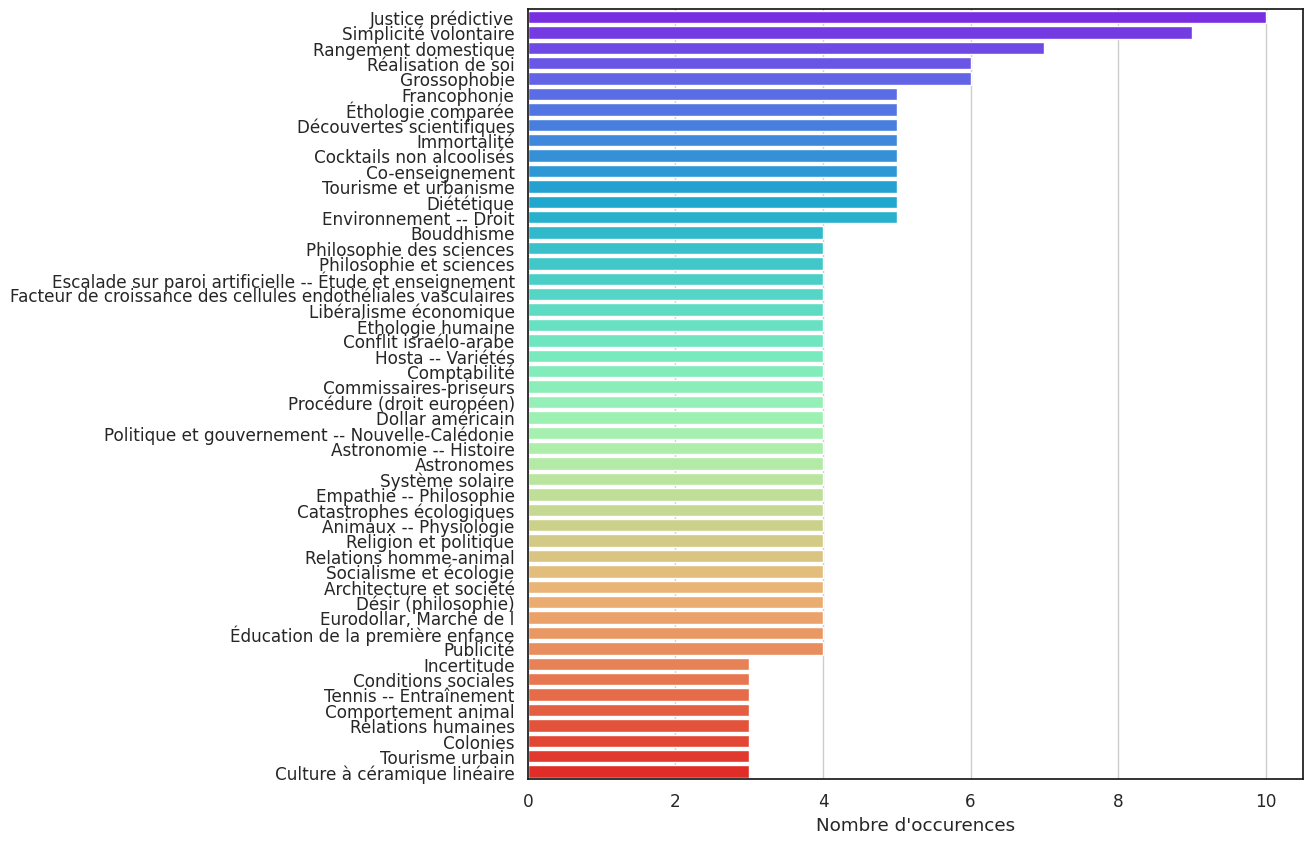

In [59]:
plot_barplot_of_tags(
    index_chains2,
    nb_of_tags=50,
    xlabel="Nombre d'occurences",
    ylabel="",
    figsave="barplot_indexationChains_reindexation.png",
    figsize=(10, 10),
    palette="rainbow",
    orient="h",
)

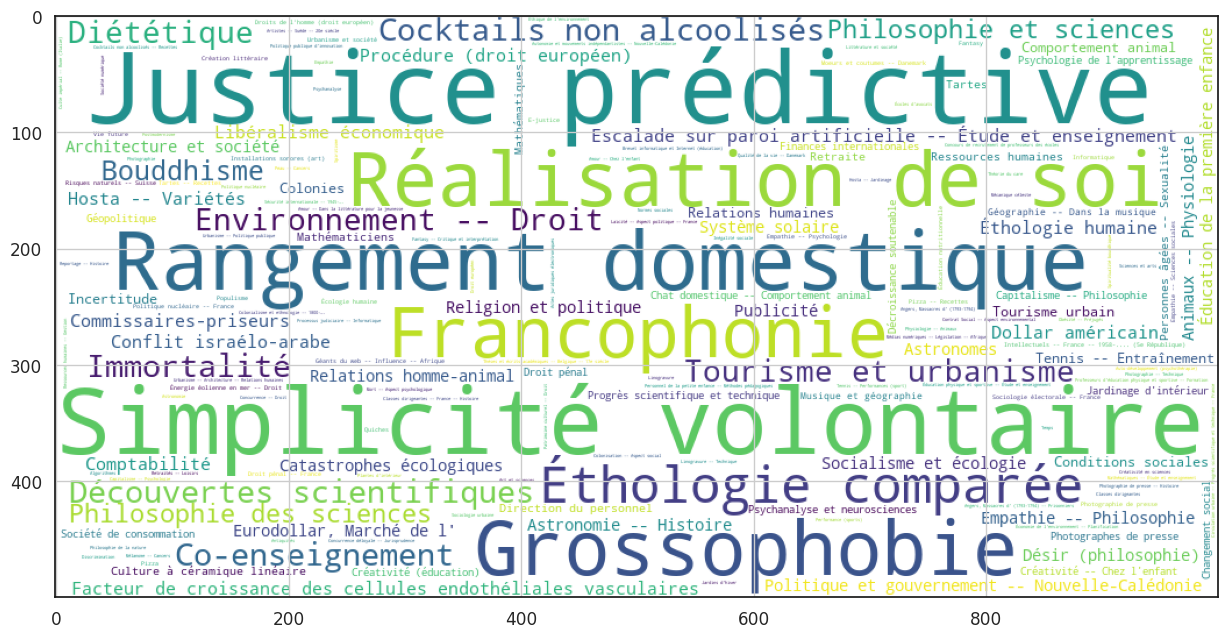

In [60]:
plot_wordcloud(
    index_chains,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_index_chains_reindexation.png",
)

In [61]:
# Binarization et vérification de l'encodage
index_chains_rameau = mlb.fit_transform([index_chains]) # all indexation chains
mlb.classes_

array(['Acceptation de soi', 'Actes juridiques électroniques',
       'Acteurs -- France', ..., 'Éthologie humaine',
       "Études d'impact (administration publique)",
       'Évolution du comportement'], dtype=object)

In [62]:
sudoc = mlb.transform(df["RAMEAU_chains"])
afe = mlb.transform(df["rameau_index_chain_AFE"])
mcr = mlb.transform(df["rameau_index_chain_MCR"])
jmf = mlb.transform(df["rameau_index_chain_JMF"])
lpl = mlb.transform(df["rameau_index_chain_LPL"])
ljz = mlb.transform(df["rameau_index_chain_LJZ"])
mpd = mlb.transform(df["rameau_index_chain_MPD"])

if include_embedding:
    embed = mlb.transform(df["embedding_chains"])

In [64]:
# Vérification de l'encodage
mlb.inverse_transform(afe)

[('Classes dirigeantes -- France -- Histoire',
  'Pouvoir communautaire -- France'),
 ('Intellectuels -- France -- 1958-.... (5e République)',),
 ('Bouddhisme',),
 ('Philosophie et sciences',),
 ('Culte impérial -- Rome (Italie)', 'Empereurs -- Rome (Italie)'),
 ('Escalade sur paroi artificielle -- Méthodes pédagogiques',
  'Escalade sur paroi artificielle -- Étude et enseignement'),
 ('Brevet Informatique et Internet (pédagogie)', 'Informatique'),
 ('Énergie éolienne en mer -- Droit',
  'Éoliennes -- Aménagement',
  'Éoliennes -- Construction et conception'),
 ('Autonomie et mouvements indépendantistes -- Nouvelle-Calédonie',
  'Politique et gouvernement -- Nouvelle-Calédonie'),
 ('Francophonie',),
 ('Mélanome -- Cancers', 'Peau -- Cancers'),
 ('Astronomes', 'Astronomie -- Histoire', 'Système solaire'),
 ('Libéralisme économique', 'Économistes -- 20e siècle'),
 ('Mobilités urbaines -- Histoire sociale -- France',
  'Transports urbains -- Histoire sociale -- France'),
 ('Tennis -- Apti

In [66]:
# Compute metrics
from itertools import combinations_with_replacement

if include_embedding:
    concept_list = [sudoc, embed, afe, mcr, jmf, lpl, ljz, mpd]
    index_name = ["sudoc", "embeddings", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
else:
    concept_list = [sudoc, afe, mcr, jmf, lpl, ljz, mpd]
    index_name = ["sudoc", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]

result_chains = dict()

for names, concept in zip(list(combinations_with_replacement(index_name, 2)), list(combinations_with_replacement(concept_list, 2))):
    print(f"comparing {names[0]} and  {names[1]}")
    name = str(names[0] + '-' + names[1])
    result_chains[name] = label_metrics_report("reindexation_chains", concept[0], concept[1], zero_division=0)

comparing sudoc and  sudoc
comparing sudoc and  afe


comparing sudoc and  mcr
comparing sudoc and  jmf
comparing sudoc and  lpl
comparing sudoc and  ljz
comparing sudoc and  mpd
comparing afe and  afe
comparing afe and  mcr
comparing afe and  jmf
comparing afe and  lpl
comparing afe and  ljz
comparing afe and  mpd
comparing mcr and  mcr
comparing mcr and  jmf
comparing mcr and  lpl
comparing mcr and  ljz
comparing mcr and  mpd
comparing jmf and  jmf
comparing jmf and  lpl
comparing jmf and  ljz
comparing jmf and  mpd
comparing lpl and  lpl
comparing lpl and  ljz
comparing lpl and  mpd
comparing ljz and  ljz
comparing ljz and  mpd
comparing mpd and  mpd


In [69]:
# Exemple de metrics
label_metrics_report("reindexation_chains", y_true=sudoc[0:5], y_pred=afe[0:5], zero_division=0, print_metrics=True)

------reindexation_chains Model Metrics-----
Accuracy: 0.2000
Hamming Loss: 0.0035\Brier score Loss: nan
Precision:
  - Macro: 0.0017
  - Micro: 0.2857
Recall:
  - Macro: 0.0017
  - Micro: 0.1111
F1-measure:
  - Macro: 0.0017
  - Micro: 0.1600
Jaccard similarity:
  - Macro: 0.0017
  - Micro: 0.0870


/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



{'Hamming Loss': 0.0035443037974683543,
 'Brier Loss': nan,
 'Accuracy': 0.2,
 'Precision - Macro': 0.0016877637130801688,
 'Recall - Macro': 0.0016877637130801688,
 'F1_Score - Macro': 0.0016877637130801688,
 'Jaccard - Macro': 0.0016877637130801688,
 'Precision - Weighted': 0.1111111111111111,
 'Recall - Weighted': 0.1111111111111111,
 'F1_Score - Weighted': 0.1111111111111111,
 'Jaccard - Weighted': 0.1111111111111111,
 'Precision - Sample': 0.4,
 'Recall - Sample': 0.22857142857142856,
 'F1_Score - Sample': 0.25,
 'Jaccard - Sample': 0.22857142857142856,
 'Precision': {'Macro': 0.0016877637130801688,
  'Micro': 0.2857142857142857,
  'Sample': 0.4},
 'Recall': {'Macro': 0.0016877637130801688,
  'Micro': 0.1111111111111111,
  'Sample': 0.22857142857142856},
 'F1-measure': {'Macro': 0.0016877637130801688, 'Micro': 0.16, 'Sample': 0.25},
 'Jaccard': {'Macro': 0.0016877637130801688,
  'Micro': 0.08695652173913043,
  'Sample': 0.22857142857142856}}

### Dataframe of results

In [70]:
result_chains_df = pd.DataFrame(result_chains).T
result_chains_df

Hamming Loss Brier Loss Accuracy Precision - Macro Recall - Macro   
sudoc-sudoc          0.0        NaN      1.0          0.192405       0.192405  \
sudoc-afe         0.0033        NaN     0.03          0.021097       0.021097   
sudoc-mcr       0.003165        NaN     0.03          0.010549       0.010549   
sudoc-jmf       0.003696        NaN     0.01          0.022222       0.022785   
sudoc-lpl       0.003401        NaN     0.04          0.027848       0.027004   
sudoc-ljz       0.003654        NaN     0.01          0.021097       0.021097   
sudoc-mpd       0.003156        NaN     0.08          0.036709       0.036709   
afe-afe              0.0        NaN      1.0          0.174684       0.174684   
afe-mcr         0.002937        NaN     0.04          0.011814       0.011814   
afe-jmf         0.003468        NaN     0.02          0.022644       0.023629   
afe-lpl         0.003274        NaN     0.01          0.023629       0.023207   
afe-ljz         0.003156        NaN     0.01          0.034599       0.035443   
afe-mpd         0.002658        NaN     0.08          0.051055       0.051055   
mcr-mcr              0.0        NaN      1.0          0.140084       0.140084   
mcr-jmf         0.003451        NaN      0.0          0.007173       0.007595   
mcr-lpl         0.003308        NaN      0.0          0.004219       0.003797   
mcr-ljz         0.003376        NaN      0.0          0.007595       0.007595   
mcr-mpd         0.003063        NaN     0.02          0.013502       0.013502   
jmf-jmf              0.0        NaN      1.0          0.216034       0.216034   
jmf-lpl         0.003755        NaN     0.01          0.021097       0.020675   
jmf-ljz         0.003789        NaN     0.01          0.024473       0.024191   
jmf-mpd          0.00346        NaN     0.02          0.032068       0.030942   
lpl-lpl              0.0        NaN      1.0          0.194937       0.194937   
lpl-ljz         0.003629        NaN     0.01          0.023207       0.023629   
lpl-mpd         0.002979        NaN     0.04          0.046414       0.046414   
ljz-ljz              0.0        NaN      1.0          0.207595       0.207595   
ljz-mpd         0.003367        NaN     0.02          0.033333       0.032911   
mpd-mpd              0.0        NaN      1.0          0.191561       0.191561   

            F1_Score - Macro Jaccard - Macro Precision - Weighted   
sudoc-sudoc         0.192405        0.192405                  1.0  \
sudoc-afe           0.021097        0.021097             0.111111   
sudoc-mcr           0.010408        0.010127             0.057692   
sudoc-jmf           0.022363        0.022222             0.116809   
sudoc-lpl           0.027286        0.027004             0.149573   
sudoc-ljz           0.021097        0.021097             0.111111   
sudoc-mpd           0.036568        0.036287             0.190171   
afe-afe             0.174684        0.174684                  1.0   
afe-mcr             0.011814        0.011814             0.066986   
afe-jmf             0.022925        0.022644             0.133174   
afe-lpl             0.023347        0.023207             0.138756   
afe-ljz              0.03488        0.034599             0.200957   
afe-mpd             0.050914        0.050633             0.294258   
mcr-mcr             0.140084        0.140084                  1.0   
mcr-jmf             0.007314        0.007173             0.050898   
mcr-lpl             0.003938        0.003797             0.035928   
mcr-ljz             0.007595        0.007595             0.053892   
mcr-mpd             0.013502        0.013502             0.095808   
jmf-jmf             0.216034        0.216034                  1.0   
jmf-lpl             0.020816        0.020675                  0.1   
jmf-ljz             0.024304        0.024191             0.123077   
jmf-mpd             0.031336        0.030942             0.161538   
lpl-lpl             0.194937        0.194937                  1.0   
lpl-lj

In [71]:
# Get max score
result_chains_df.sort_values(by="Jaccard - Sample", ascending=False)

Hamming Loss Brier Loss Accuracy Precision - Macro Recall - Macro   
sudoc-sudoc          0.0        NaN      1.0          0.192405       0.192405  \
afe-afe              0.0        NaN      1.0          0.174684       0.174684   
ljz-ljz              0.0        NaN      1.0          0.207595       0.207595   
lpl-lpl              0.0        NaN      1.0          0.194937       0.194937   
jmf-jmf              0.0        NaN      1.0          0.216034       0.216034   
mcr-mcr              0.0        NaN      1.0          0.140084       0.140084   
mpd-mpd              0.0        NaN      1.0          0.191561       0.191561   
afe-mpd         0.002658        NaN     0.08          0.051055       0.051055   
lpl-mpd         0.002979        NaN     0.04          0.046414       0.046414   
sudoc-mpd       0.003156        NaN     0.08          0.036709       0.036709   
afe-ljz         0.003156        NaN     0.01          0.034599       0.035443   
jmf-mpd          0.00346        NaN     0.02          0.032068       0.030942   
ljz-mpd         0.003367        NaN     0.02          0.033333       0.032911   
sudoc-lpl       0.003401        NaN     0.04          0.027848       0.027004   
sudoc-afe         0.0033        NaN     0.03          0.021097       0.021097   
afe-jmf         0.003468        NaN     0.02          0.022644       0.023629   
afe-lpl         0.003274        NaN     0.01          0.023629       0.023207   
jmf-ljz         0.003789        NaN     0.01          0.024473       0.024191   
sudoc-jmf       0.003696        NaN     0.01          0.022222       0.022785   
sudoc-ljz       0.003654        NaN     0.01          0.021097       0.021097   
lpl-ljz         0.003629        NaN     0.01          0.023207       0.023629   
jmf-lpl         0.003755        NaN     0.01          0.021097       0.020675   
afe-mcr         0.002937        NaN     0.04          0.011814       0.011814   
mcr-mpd         0.003063        NaN     0.02          0.013502       0.013502   
sudoc-mcr       0.003165        NaN     0.03          0.010549       0.010549   
mcr-jmf         0.003451        NaN      0.0          0.007173       0.007595   
mcr-ljz         0.003376        NaN      0.0          0.007595       0.007595   
mcr-lpl         0.003308        NaN      0.0          0.004219       0.003797   

            F1_Score - Macro Jaccard - Macro Precision - Weighted   
sudoc-sudoc         0.192405        0.192405                  1.0  \
afe-afe             0.174684        0.174684                  1.0   
ljz-ljz             0.207595        0.207595                  1.0   
lpl-lpl             0.194937        0.194937                  1.0   
jmf-jmf             0.216034        0.216034                  1.0   
mcr-mcr             0.140084        0.140084                  1.0   
mpd-mpd             0.191561        0.191561                  1.0   
afe-mpd             0.050914        0.050633             0.294258   
lpl-mpd             0.046414        0.046414             0.234043   
sudoc-mpd           0.036568        0.036287             0.190171   
afe-ljz              0.03488        0.034599             0.200957   
jmf-mpd             0.031336        0.030942             0.161538   
ljz-mpd             0.033052        0.032771             0.163347   
sudoc-lpl           0.027286        0.027004             0.149573   
sudoc-afe           0.021097        0.021097             0.111111   
afe-jmf             0.022925        0.022644             0.133174   
afe-lpl             0.023347        0.023207             0.138756   
jmf-ljz             0.024304        0.024191             0.123077   
sudoc-jmf           0.022363        0.022222             0.116809   
sudoc-ljz           0.021097        0.021097             0.111111   
lpl-ljz             0.023347        0.023207             0.117021   
jmf-lpl             0.020816        0.020675                  0.1   
afe-mcr             0.011814        0.011814             0.066986   
mcr-mp

### Plot

In [72]:
# Plot results
metrics_radar_plot(
    result_chains_df,
    metrics=metrics,
    remove_identity=True,
    title="Prédiction des chaines d'indexation",
    savefig="metrics_reindexation_Chains_raw.html",)

## Bag of words (tf-idf or CountVectorizer)

In [74]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### tfID vectorizer

In [75]:
def identity_tokenizer(text):
    return text
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, ngram_range=(1,3), lowercase=False)

In [77]:
# Vectorization
vectorised_concepts = vectorizer.fit_transform(labels)
autorites = vectorizer.get_feature_names_out()

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

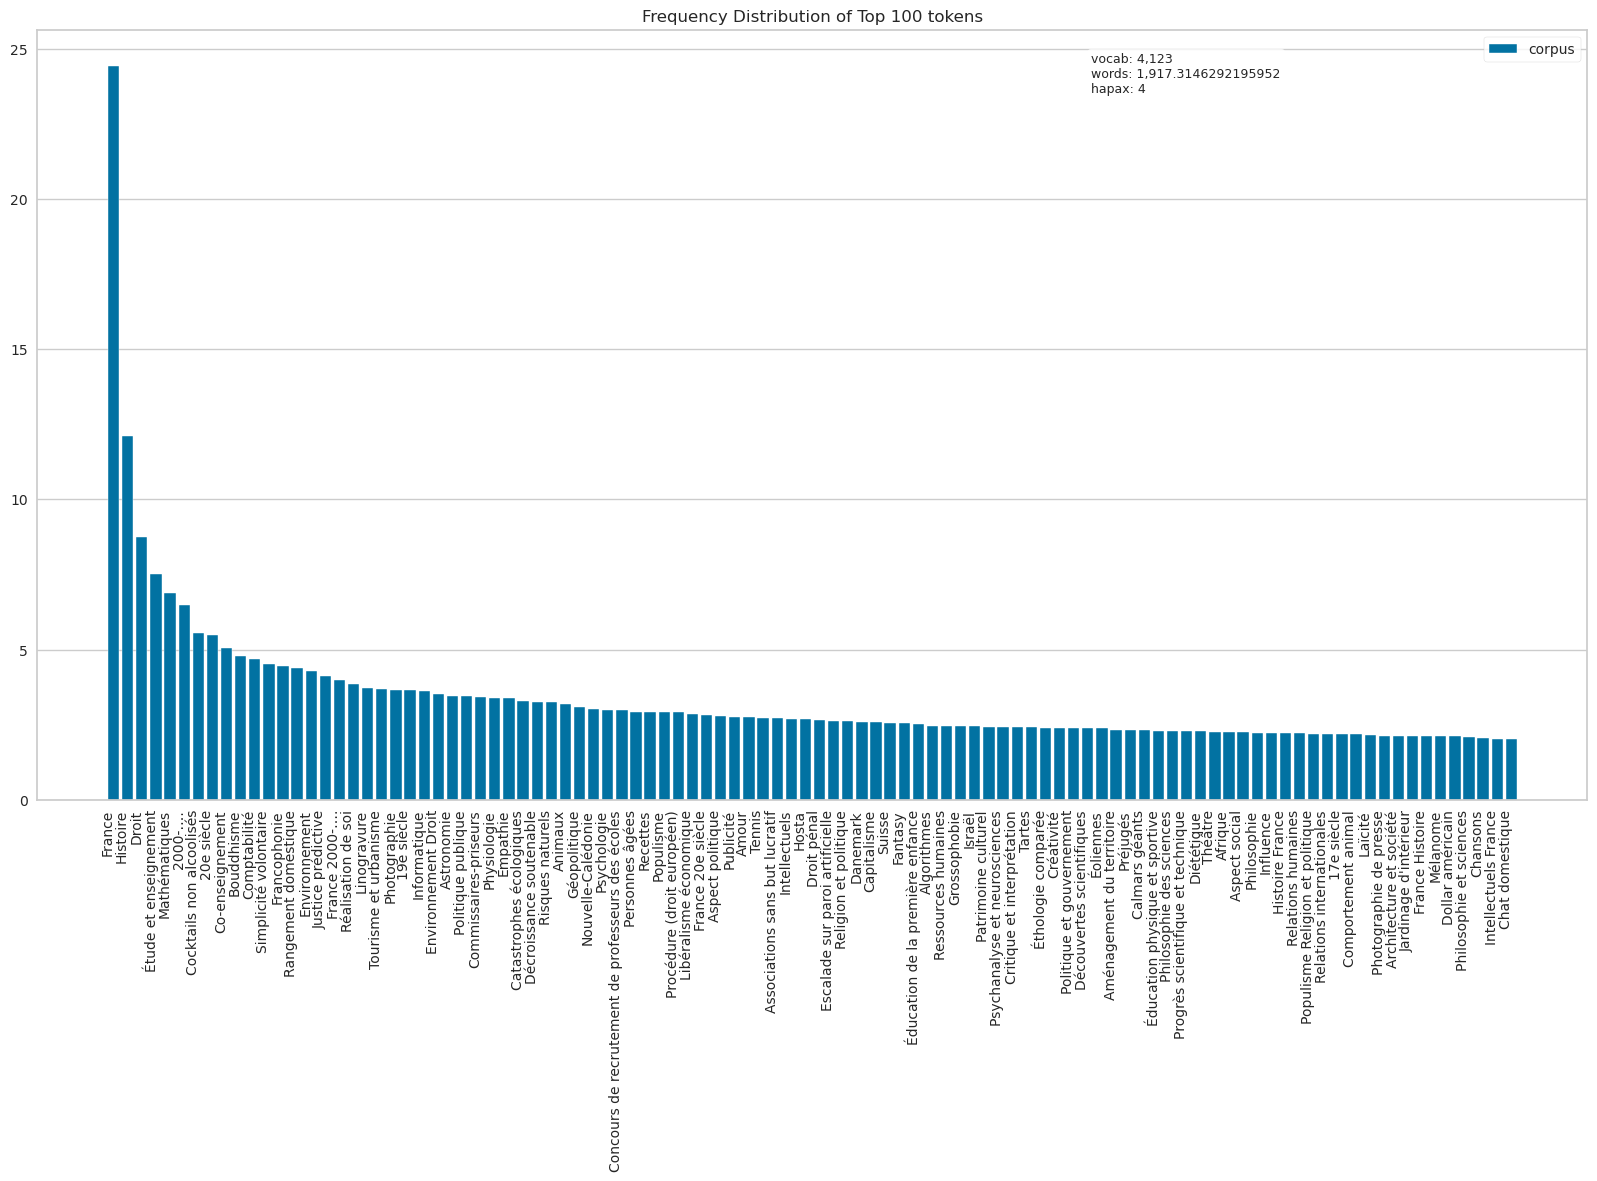

<Axes: title={'center': 'Frequency Distribution of Top 100 tokens'}>

In [78]:
from yellowbrick.text import FreqDistVisualizer
plt.figure(figsize=(20, 10))
features = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, n=100, orient="v")
visualizer.fit(vectorised_concepts)
visualizer.show()

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial

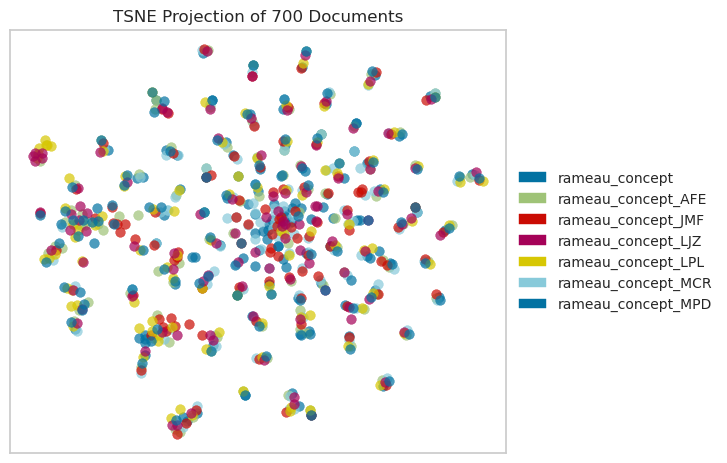

<Axes: title={'center': 'TSNE Projection of 700 Documents'}>

In [79]:
# Visualize the dataset with T-SNE
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(vectorised_concepts, df_pivot["variable"])
tsne.show()

### Count vectorizer

In [80]:
vectorizer = CountVectorizer(tokenizer=identity_tokenizer, ngram_range=(1,3), lowercase=False)
vectorised_concepts = vectorizer.fit_transform(df_pivot["value"])

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [81]:
# Vectorization
vectorised_concepts = vectorizer.fit_transform(labels, df_pivot["variable"])
autorites = vectorizer.get_feature_names_out()

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial

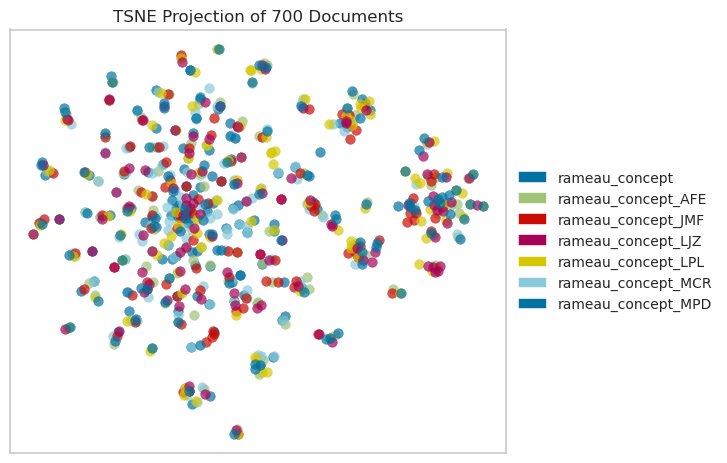

<Axes: title={'center': 'TSNE Projection of 700 Documents'}>

In [82]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(vectorised_concepts, df_pivot["variable"])
tsne.show()

## Test kmeans


In [83]:
# Select columns to use
concept_cols = [
    "rameau_concept", "rameau_concept_AFE", "rameau_concept_MCR",
    "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ",
    "rameau_concept_MPD"]
df_for_analysis = df[concept_cols]
labels_encoded = pd.DataFrame(mlb.fit_transform(flatten(df_pivot["value"])))

In [84]:
len(labels_encoded), len(labels_encoded[0])

(2882, 2882)

In [85]:
# Clustering based on Kmeans
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [86]:
# test different clusters
sil = []
davis_bouldin = []
sum_of_squared_distances = []
param_range = range(3,100)
for k in param_range:
    print(f"Clustering with {k} groups")
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(labels_encoded)
    labels = kmeans.labels_
    sum_of_squared_distances.append(kmeans.inertia_)
    silh = silhouette_score(
        labels_encoded, labels, metric="euclidean", sample_size=50000, random_state=200
        )
    dav = davies_bouldin_score(labels_encoded, labels)
    sil.append(silh)
    davis_bouldin.append(dav)

Clustering with 3 groups
Clustering with 4 groups
Clustering with 5 groups
Clustering with 6 groups
Clustering with 7 groups
Clustering with 8 groups
Clustering with 9 groups
Clustering with 10 groups
Clustering with 11 groups
Clustering with 12 groups
Clustering with 13 groups
Clustering with 14 groups
Clustering with 15 groups
Clustering with 16 groups
Clustering with 17 groups
Clustering with 18 groups
Clustering with 19 groups
Clustering with 20 groups
Clustering with 21 groups
Clustering with 22 groups
Clustering with 23 groups
Clustering with 24 groups
Clustering with 25 groups
Clustering with 26 groups
Clustering with 27 groups
Clustering with 28 groups
Clustering with 29 groups
Clustering with 30 groups
Clustering with 31 groups
Clustering with 32 groups
Clustering with 33 groups
Clustering with 34 groups
Clustering with 35 groups
Clustering with 36 groups
Clustering with 37 groups
Clustering with 38 groups
Clustering with 39 groups
Clustering with 40 groups
Clustering with 41 

In [87]:
# Find optimal values accordin to silhouette and Davis-Bouldin scores
opt_val_sil = param_range[sil.index(max(sil))]
opt_val_db = param_range[davis_bouldin.index(min(davis_bouldin))]

In [88]:
def plot_metrics(
    sil, davis_bouldin, param_name, param_range, silhouette_color="red", db_color="blue"
):
    """
    Plot the silhouette score and davies_bouldin score for a range of cluster number.

    Parameters:
    -----------
        - sil (list): list of silhouette scores for all values of hyper-parameter range
        - davis_bouldin (list): list of davies-bouldin scores along hyper-parameter range
        - param_name (str): name of the hyper-parameter to be fined-tuned
        - param_range (list) : range of possible values for hyper-parameter tuning
        - silhouette_color (str): color for the silhouette score (defaut: 'red')
        - db_color (str): color for the silhouette score (defaut: 'blue')

    Returns :
    ---------
        - Evolution of silhouette and Davies-bouldin scores along hyper-parameter range
    """

    # plot
    _, ax1 = plt.subplots()
    ax1.set_xlabel(param_name)
    ax1.set_ylabel("Silhouette_score", color=silhouette_color)
    ax1.plot(param_range, sil, color=silhouette_color)
    ax1.tick_params(axis="y", labelcolor=silhouette_color)

    # Adding Twin Axes
    ax2 = ax1.twinx()
    ax2.set_ylabel("Davies_bouldin", color=db_color)
    ax2.plot(param_range, davis_bouldin, color=db_color)
    ax2.tick_params(axis="y", labelcolor=db_color)

    # Show plot
    plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

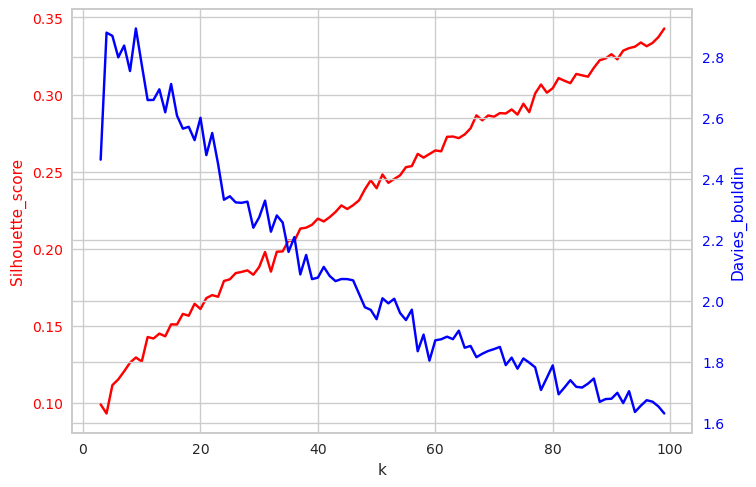

In [89]:
plot_metrics(sil, davis_bouldin, param_name="k", param_range=param_range, silhouette_color="red", db_color="blue")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

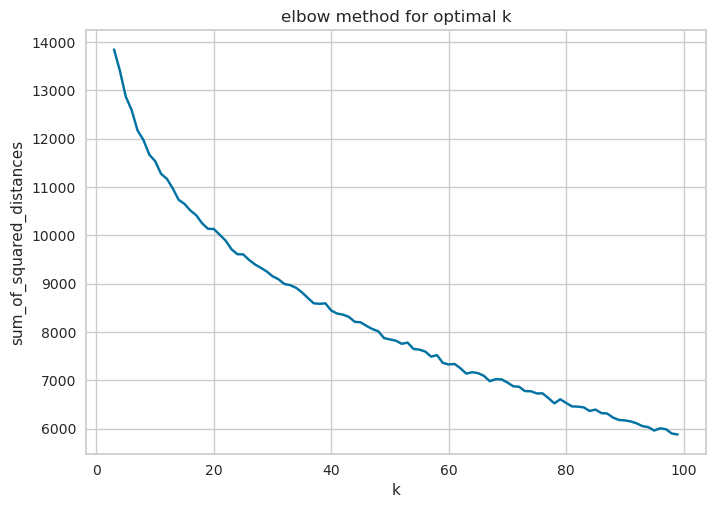

In [90]:
# Plot inertia
plt.plot(param_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [91]:
# Best clustering
#k = opt_val_sil
k = 59
kmeans = KMeans(n_clusters=k)
kmeans.fit(labels_encoded)

KMeans(n_clusters=59)

Graph des Silhouettes



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

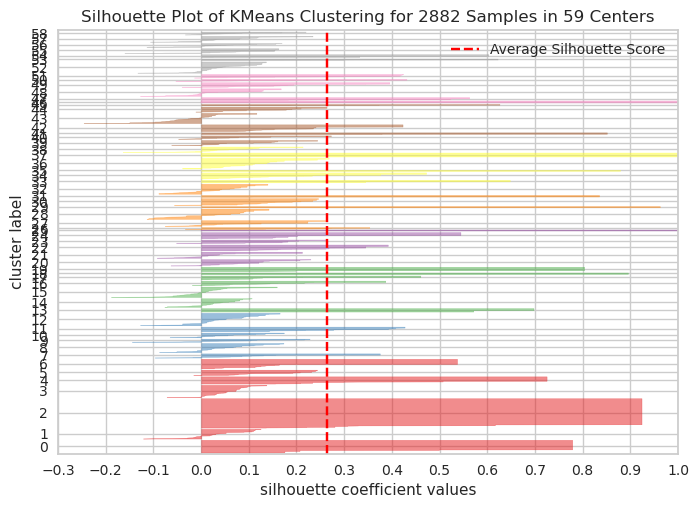

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2882 Samples in 59 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [92]:
# Graph des silhouettes
from yellowbrick.cluster import SilhouetteVisualizer
print("Graph des Silhouettes\n")
silhouette_vis = SilhouetteVisualizer(kmeans)
silhouette_vis.fit(labels_encoded)
silhouette_vis.poof()

In [93]:
# Plot clusters
# Fit visualisation pipeline
import sklearn
from sklearn.manifold import TSNE
tsne = TSNE().fit_transform(labels_encoded)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

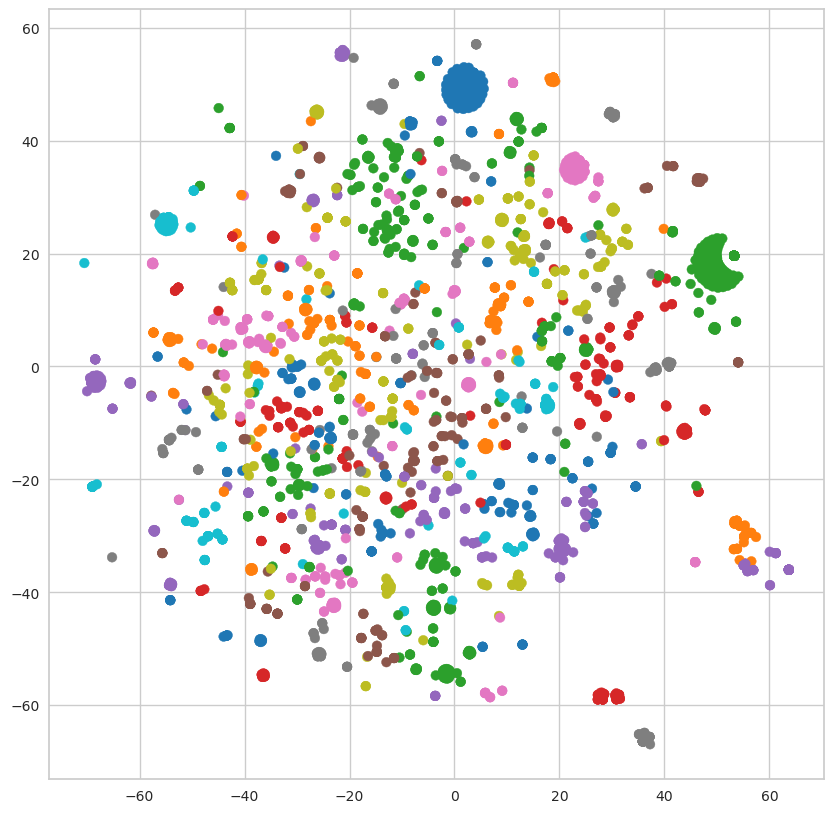

In [94]:
# Plot TSNE
plt.figure(figsize=(10, 10))
axe = plt.axes()
clusters = kmeans.labels_
num_classes = k
palette = np.array(sns.color_palette("tab10", num_classes))
axe.scatter(x=tsne[:, 0], y=tsne[:, 1], c=palette[clusters.astype(int)])
plt.legend()